In [17]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../../..")

# Importing GemPy
# from gempy.core import gempy_api as gp
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [20]:
geo_model = gp.create_model('Tutorial_ch1-1_Basics')

C:\Users\xiaohe\anaconda3\envs\gempy\lib\site-packages\theano\gpuarray\dnn.py:184: UserWarning: Your cuDNN version is more recent than Theano. If you encounter problems, try updating Theano or downgrading cuDNN to a version >= v5 and <= v7.
  warnings.warn("Your cuDNN version is more recent than "


In [21]:
data_path= '../..'
# Importing the data from CSV-files and setting extent and resolution
gp.init_data(
    geo_model, [0, 2000., 0, 2000., 0, 2000.], [50, 50, 50], 
    path_o = data_path+"/data/input_data/tut_chapter1/simple_fault_model_orientations.csv",
    path_i = data_path+"/data/input_data/tut_chapter1/simple_fault_model_points.csv",
    default_values=True
)

Active grids: ['regular']


Tutorial_ch1-1_Basics  2020-05-12 20:38

In [22]:
geo_model.surfaces

,surface,series,order_surfaces,isActive,color,id
0,Shale,Default series,1,True,#015482,1
1,Sandstone_1,Default series,2,True,#9f0052,2
2,Siltstone,Default series,3,True,#ffbe00,3
3,Sandstone_2,Default series,4,True,#728f02,4
4,Main_Fault,Default series,5,True,#443988,5
5,basement,Basement,1,True,#ff3f20,6


In [23]:
gp.get_data(geo_model, 'surface_points').head()

,X,Y,Z,X_r,Y_r,Z_r,surface,series,id,order_series,smooth
0,800,50,750,0.486942,0.250100,0.460626,Shale,Default series,1,1,0.000002
1,800,150,700,0.486942,0.276416,0.447468,Shale,Default series,1,1,0.000002
2,800,300,700,0.486942,0.315889,0.447468,Shale,Default series,1,1,0.000002
3,800,500,800,0.486942,0.368521,0.473784,Shale,Default series,1,1,0.000002
4,800,1000,1000,0.486942,0.500100,0.526416,Shale,Default series,1,1,0.000002


In [24]:
gp.get_data(geo_model, 'orientations').head()

,X,Y,Z,X_r,Y_r,Z_r,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series,smooth
0,1000,1000,950.000,0.539574,0.5001,0.513258,0.316229,1.000019e-12,0.948683,18.435,90.0,1.0,Shale,Default series,1,1,0.01
1,400,1000,1400.000,0.381679,0.5001,0.631679,0.316229,1.000019e-12,0.948683,18.435,90.0,1.0,Sandstone_2,Default series,4,1,0.01
2,500,1000,864.602,0.407995,0.5001,0.490785,-0.948683,9.998257e-13,0.316229,71.565,270.0,1.0,Main_Fault,Default series,5,1,0.01


In [26]:
gp.map_series_to_surfaces(
    geo_model,
    {
        "Fault_Series":'Main_Fault',
        "Strat_Series": ('Sandstone_2','Siltstone', 'Shale', 'Sandstone_1', 'basement')
    }, remove_unused_series=True)

,surface,series,order_surfaces,isActive,color,id
4,Main_Fault,Fault_Series,1,True,#443988,1
0,Shale,Strat_Series,1,True,#015482,2
1,Sandstone_1,Strat_Series,2,True,#9f0052,3
2,Siltstone,Strat_Series,3,True,#ffbe00,4
3,Sandstone_2,Strat_Series,4,True,#728f02,5
5,basement,Strat_Series,5,True,#ff3f20,6


In [27]:
geo_model.series

,order_series,BottomRelation,isActive
Fault_Series,1,Erosion,NaN
Strat_Series,2,Erosion,NaN


In [28]:
geo_model.set_is_fault(['Fault_Series'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,isFault,isFinite
Fault_Series,True,False
Strat_Series,False,False


In [29]:
geo_model.faults.faults_relations_df

,Fault_Series,Strat_Series
Fault_Series,False,True
Strat_Series,False,False


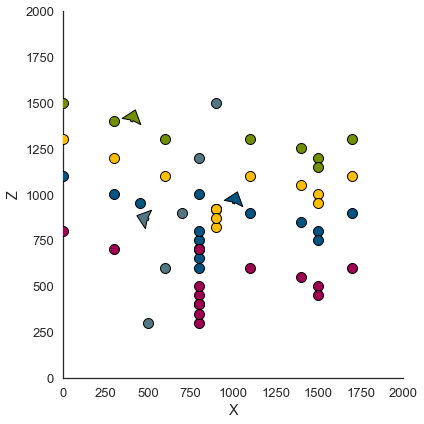

In [30]:
gp.plot.plot_data(geo_model, direction='y')

In [32]:
gp.plot.plot_3D(geo_model)

In [33]:
gp.set_interpolation_data(geo_model,
                          compile_theano=True,
                          theano_optimizer='fast_compile',
                          verbose=[])

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!
Kriging values: 
                  values
range            3464.1
$C_o$            285714
drift equations  [3, 3]


In [34]:
gp.get_data(geo_model, 'kriging')

,values
range,3464.1
$C_o$,285714
drift equations,"[3, 3]"


In [35]:
geo_model.additional_data.structure_data

,values
isLith,True
isFault,True
number faults,1
number surfaces,5
number series,2
number surfaces per series,"[1, 4]"
len surfaces surface_points,"[5, 16, 15, 13, 8]"
len series surface_points,"[5, 52]"
len series orientations,"[1, 2]"


In [36]:
sol = gp.compute_model(geo_model, compute_mesh=True, sort_surfaces=False)

In [45]:
geo_model.solutions.lith_block

array([6., 6., 6., ..., 2., 2., 2.])

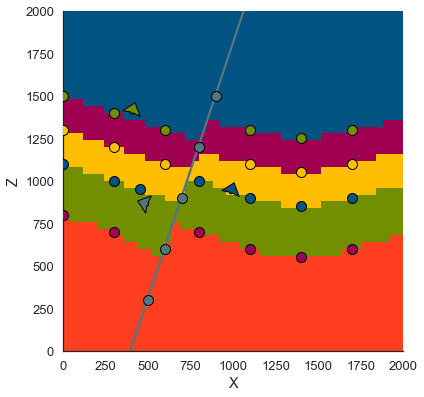

In [48]:
# %matplotlib inline
gp.plot.plot_section(geo_model, cell_number=25,
                     direction='y', show_data=True)

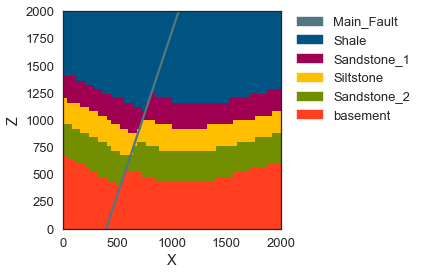

In [49]:
gp.plot.plot_section(geo_model, cell_number=0,
                     direction='y', show_data=True)

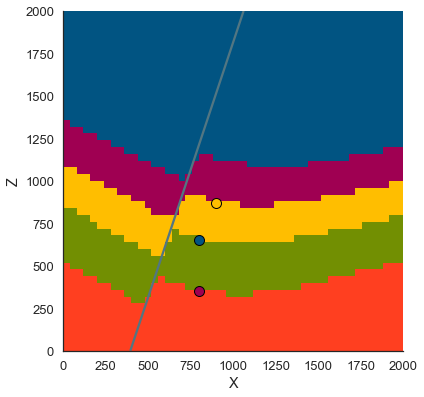

In [50]:
gp.plot.plot_section(geo_model, cell_number=49,
                     direction='y', show_data=True)

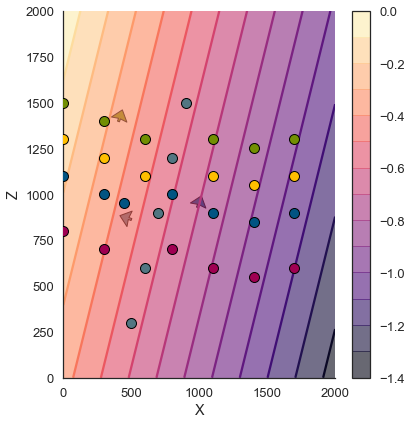

In [51]:
gp.plot.plot_scalar_field(geo_model, cell_number=25, N=15, series=0, 
                          direction='y', show_data=True)

plt.colorbar()

In [52]:
geo_model.solutions.scalar_field_at_surface_points

array([[-0.55768591,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.65527163,  0.55778384,  0.7341465 ,  0.82009908]])

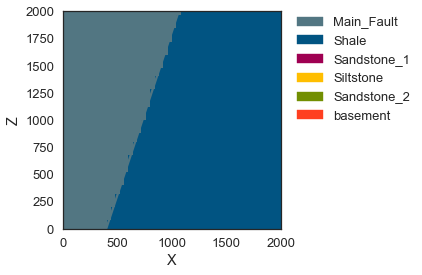

In [53]:
gp.plot.plot_section(geo_model, cell_number=25, block=geo_model.solutions.block_matrix[0, 0],
                     show_data=False)

In [54]:
ver , sim = gp.get_surfaces(geo_model)

In [64]:
print(len(ver), len(ver[0]))

5 3300


In [83]:
ver[0]

array([[ 400.        ,    0.        ,   40.        ],
       [ 386.66667938,    0.        ,    0.        ],
       [ 400.        ,   40.        ,   40.        ],
       ...,
       [1013.33335876, 1960.        , 1880.        ],
       [1026.66664124, 1960.        , 1920.        ],
       [1040.        , 1960.        , 1960.        ]])

In [100]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [101]:
x, y, z = ver[0][:, 0], ver[0][:, 1], ver[0][:, 2]

In [102]:
X, Y = np.meshgrid(x, y)

In [103]:
Z = np.array([z])

In [104]:
Z = np.repeat(Z, Z.shape[1], axis=0)

In [105]:
Z.shape

(3300, 3300)

<IPython.core.display.Javascript object>


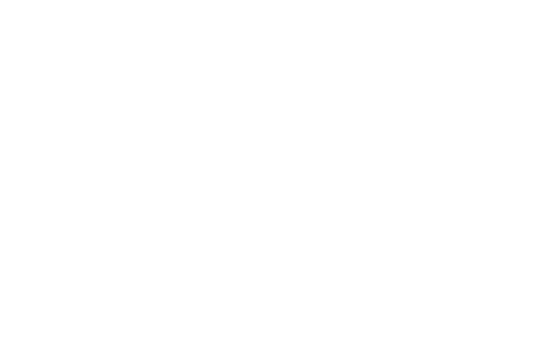

<IPython.core.display.Javascript object>


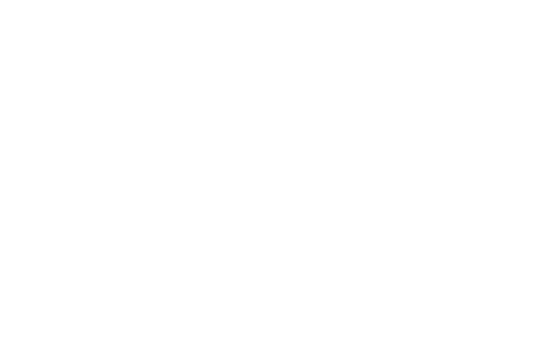

In [115]:
# %matplotlib notebook

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [65]:
print(len(sim), len(sim[0]))

5 6370


In [66]:
gp.plot.plot_3D(geo_model)

In [67]:
x_i = np.array([[3,5,6]])
sol = gp.compute_model_at(x_i, geo_model)

Active grids: ['custom']


In [76]:
x_i.shape

(1, 3)

In [80]:
sol[0].shape

(1, 105)

In [68]:
sol[0][0, :x_i.shape[0]]

array([6.])